In [1]:
from PlayerCounter import CountPlayers
totalPlayers = CountPlayers()
print(totalPlayers)

11080


c:\Users\gameuser\Desktop\GA_25_P1_Part3_Darragh_McKernan\DailyActiveUsers.py:4: UserWarning: Parsing dates in %Y-%m-%d %H:%M:%S format when dayfirst=True was specified. Pass `dayfirst=False` or specify a format to silence this warning.
  dailyLogins = pd.read_csv("C:\\Users\\gameuser\\Desktop\\GA_25_P1_Part3_Darragh_McKernan\\data\\player_logged_in.csv",parse_dates=["Time"],dayfirst=True)


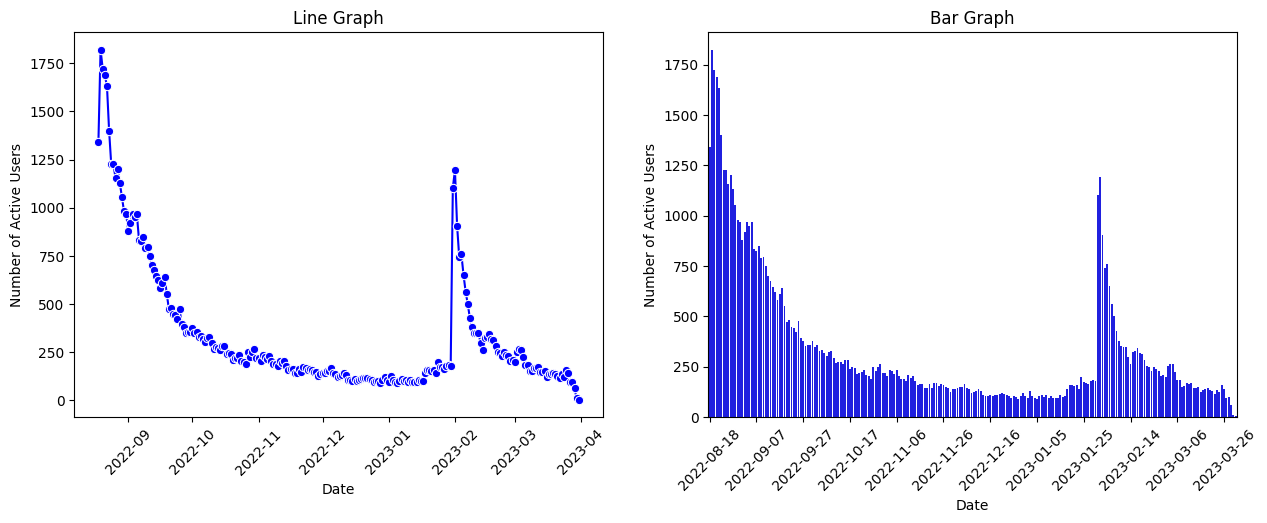

In [2]:
from DailyActiveUsers import GetDailyActiveUsers
import matplotlib.pyplot as plt
import seaborn as sns

dailyUsers = GetDailyActiveUsers()

plt.figure(figsize=(15, 5))

plt.subplot(1, 2, 1)
sns.lineplot(data=dailyUsers, x="Date", y="DAU", marker="o", color="b")
plt.title("Line Graph")
plt.xlabel("Date")
plt.ylabel("Number of Active Users")
plt.xticks(rotation=45)

plt.subplot(1, 2, 2)
sns.barplot(data=dailyUsers, x="Date", y="DAU", color="blue")
plt.title("Bar Graph")
plt.xlabel("Date")
plt.ylabel("Number of Active Users")
plt.xticks(ticks=range(0, len(dailyUsers), 20), labels=dailyUsers['Date'][::20], rotation=45)

plt.show()

c:\Users\gameuser\Desktop\GA_25_P1_Part3_Darragh_McKernan\MonthlyActiveUsers.py:4: UserWarning: Parsing dates in %Y-%m-%d %H:%M:%S format when dayfirst=True was specified. Pass `dayfirst=False` or specify a format to silence this warning.
  monthlyLogins = pd.read_csv("C:\\Users\\gameuser\\Desktop\\GA_25_P1_Part3_Darragh_McKernan\\data\\player_logged_in.csv",parse_dates=["Time"],dayfirst=True)


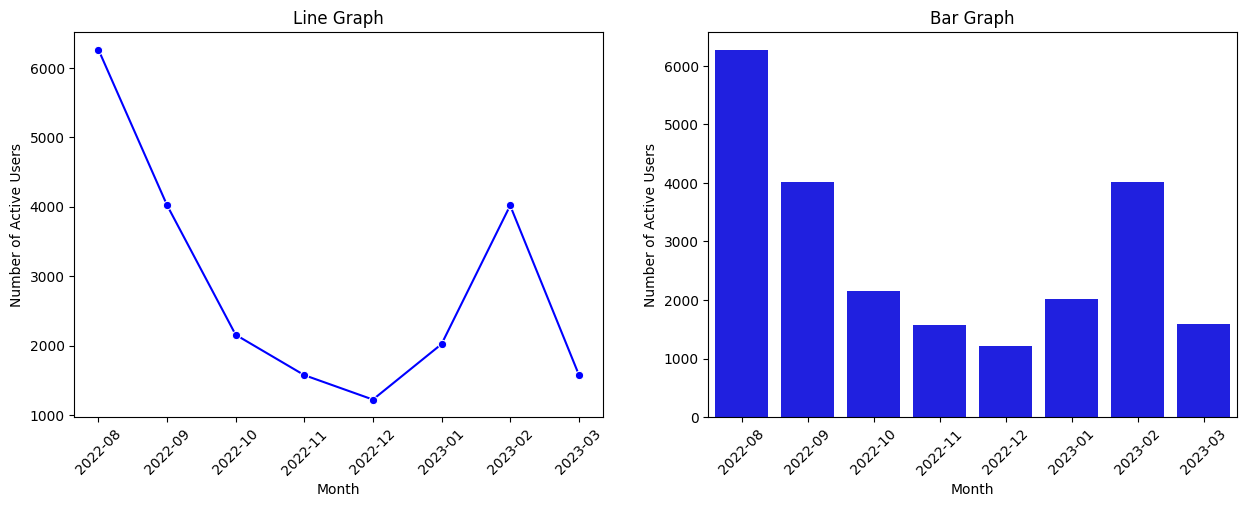

In [3]:
from MonthlyActiveUsers import GetMonthlyActiveUsers
import matplotlib.pyplot as plt
import seaborn as sns

monthlyUsers = GetMonthlyActiveUsers()

plt.figure(figsize=(15, 5))

plt.subplot(1, 2, 1)
sns.lineplot(data=monthlyUsers, x="Month", y="MAU", marker="o", color="b")
plt.title("Line Graph")
plt.xlabel("Month")
plt.ylabel("Number of Active Users")
plt.xticks(rotation=45)

plt.subplot(1, 2, 2)
sns.barplot(data=monthlyUsers, x="Month", y="MAU", color="blue")
plt.title("Bar Graph")
plt.xlabel("Month")
plt.ylabel("Number of Active Users")
plt.xticks(rotation=45)

plt.show()

c:\Users\gameuser\Desktop\GA_25_P1_Part3_Darragh_McKernan\MonthlyActiveUsers.py:4: UserWarning: Parsing dates in %Y-%m-%d %H:%M:%S format when dayfirst=True was specified. Pass `dayfirst=False` or specify a format to silence this warning.
  monthlyLogins = pd.read_csv("C:\\Users\\gameuser\\Desktop\\GA_25_P1_Part3_Darragh_McKernan\\data\\player_logged_in.csv",parse_dates=["Time"],dayfirst=True)
c:\Users\gameuser\Desktop\GA_25_P1_Part3_Darragh_McKernan\DailyActiveUsers.py:4: UserWarning: Parsing dates in %Y-%m-%d %H:%M:%S format when dayfirst=True was specified. Pass `dayfirst=False` or specify a format to silence this warning.
  dailyLogins = pd.read_csv("C:\\Users\\gameuser\\Desktop\\GA_25_P1_Part3_Darragh_McKernan\\data\\player_logged_in.csv",parse_dates=["Time"],dayfirst=True)


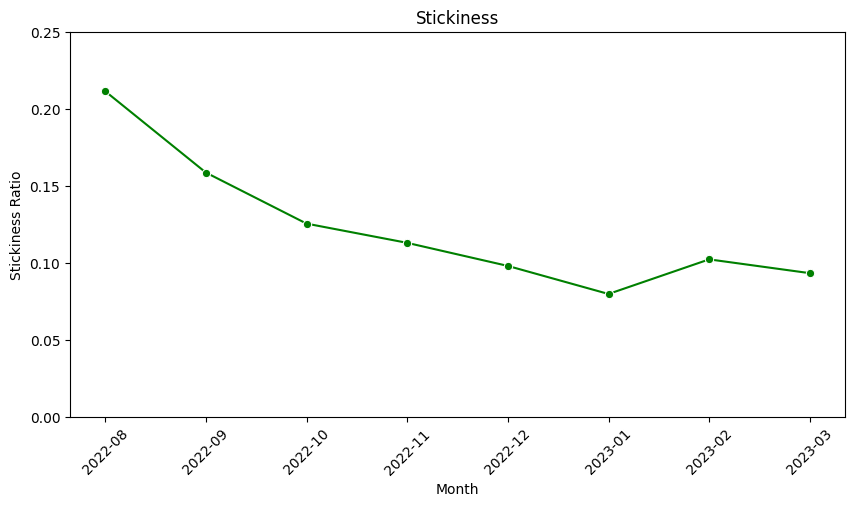

In [4]:
from MonthlyActiveUsers import GetMonthlyActiveUsers
from DailyActiveUsers import GetDailyActiveUsers
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

monthlyUsers = GetMonthlyActiveUsers()
dailyUsers = GetDailyActiveUsers()

dailyUsers["Month"] = pd.to_datetime(dailyUsers["Date"]).dt.to_period("M").astype(str)
monthlyDAU = dailyUsers.groupby("Month")["DAU"].mean().reset_index()
stickiness = pd.merge(monthlyDAU, monthlyUsers, on="Month")
stickiness["Stickiness"] = stickiness["DAU"] / stickiness["MAU"]

plt.figure(figsize=(10, 5))
sns.lineplot(data=stickiness, x="Month", y="Stickiness", marker="o", color="g")
plt.title("Stickiness")
plt.xlabel("Month")
plt.ylabel("Stickiness Ratio")
plt.xticks(rotation=45)
plt.ylim(0, 0.25)

plt.show()

### Reflection
#### The graph shows that the amount of times per month that players are returning slowly decreases over time but there is a noticable bump in February of 2023. This is more than likely due to the release of a DLC as PowerWash Sim had several free and premium DLCs that added new levels to the game which could draw back existing players and bring in new players. 

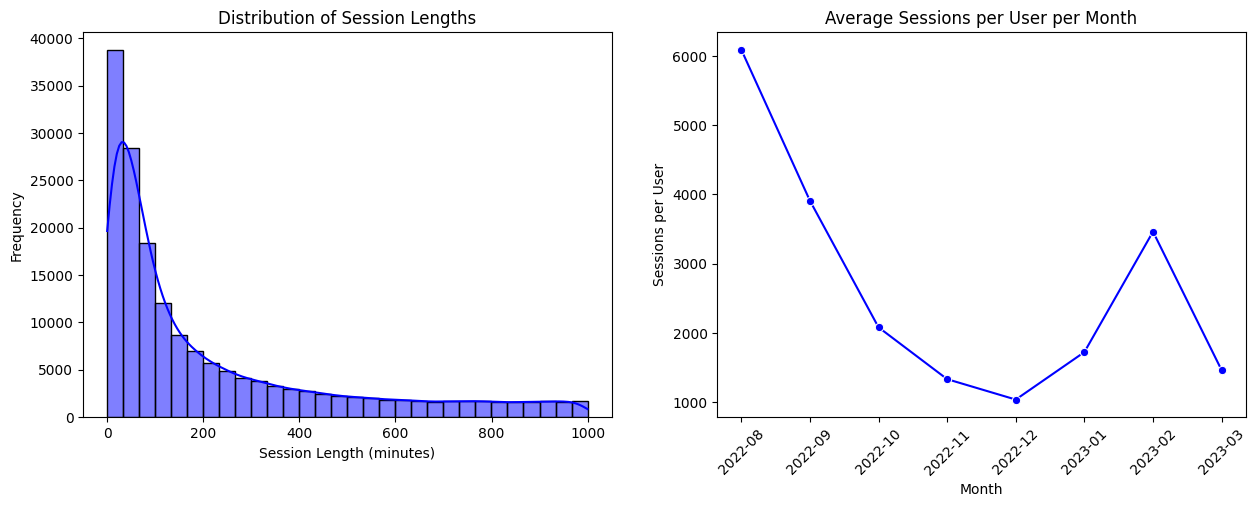

In [ ]:
from EstimatedLogins import GetEstimatedSessions
from PlayerCounter import PlayerLogin
from PlayerCounter import PlayerLogout
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

logins = PlayerLogin()
logouts = PlayerLogout()

estimatedSessionLengths = pd.merge(logins,logouts,on="pid")

estimatedSessionLengths["SessionTime"] = (estimatedSessionLengths["LogoutTime"] - estimatedSessionLengths["LoginTime"]).dt.total_seconds() / 60

# data does not line up near the end so just drop any negative data any and any sessions over 17ish hours
estimatedSessionLengths = estimatedSessionLengths.loc[(estimatedSessionLengths["SessionTime"] > 0) & (estimatedSessionLengths["SessionTime"] <= 1000)]

#print(estimatedSessionLengths)
totalSessions = total_sessions = len(estimatedSessionLengths)
medianSessionTime = estimatedSessionLengths["SessionTime"].median()
  
estimatedSessionLengths["Month"] = estimatedSessionLengths["LoginTime"].dt.to_period("M").astype(str)
sessionPerMonth = estimatedSessionLengths.groupby("Month")["pid"].nunique().reset_index(name="SessionsPerUser")

plt.figure(figsize=(15, 5))

plt.subplot(1, 2, 1)
sns.histplot(estimatedSessionLengths["SessionTime"], bins=30, color="blue", kde=True)
plt.title("Distribution of Session Lengths")
plt.xlabel("Session Length (minutes)")
plt.ylabel("Frequency")

plt.subplot(1, 2, 2)
sns.lineplot(data=sessionPerMonth, x="Month", y="SessionsPerUser", marker="o", color="b")
plt.title("Average Sessions per User per Month")
plt.xlabel("Month")
plt.ylabel("Sessions per User")
plt.xticks(rotation=45)

plt.show()

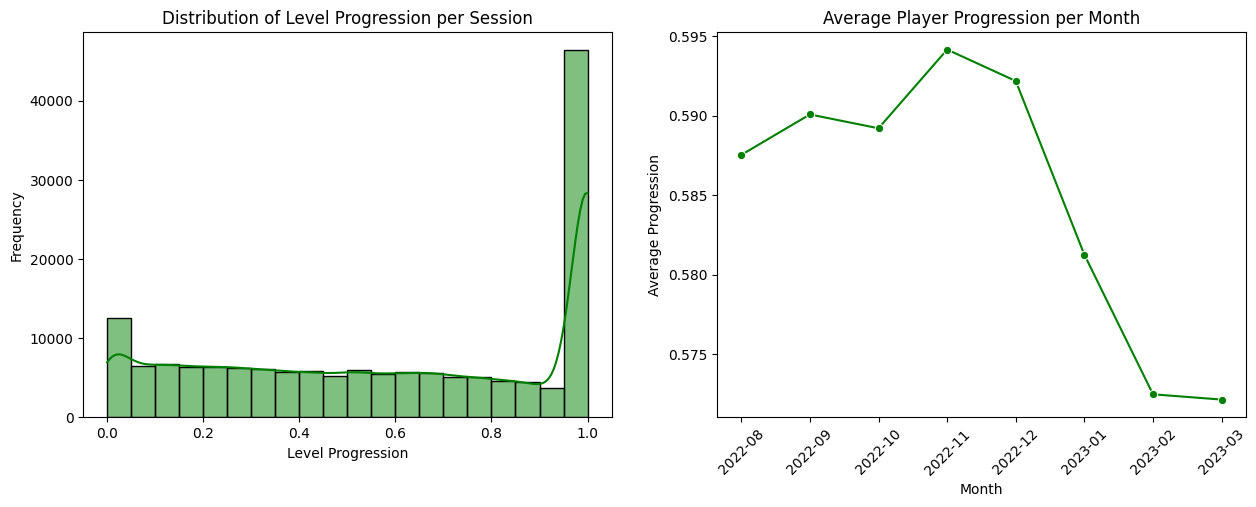

In [6]:
from EstimatedLogins import GetEstimatedSessions
from PlayerCounter import PlayerLogin
from PlayerCounter import PlayerLogout
from PlayerCounter import GetLevelProgression
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

logins = PlayerLogin()
logouts = PlayerLogout()
progression = GetLevelProgression()

estimatedSessionLengths = pd.merge(logins, logouts, on="pid")
estimatedSessionLengths = pd.merge(estimatedSessionLengths, progression, on=["pid", "LogoutTime"])
estimatedSessionLengths["SessionTime"] = (estimatedSessionLengths["LogoutTime"] - estimatedSessionLengths["LoginTime"]).dt.total_seconds() / 60
estimatedSessionLengths = estimatedSessionLengths.loc[(estimatedSessionLengths["SessionTime"] > 0) & (estimatedSessionLengths["SessionTime"] <= 1000)]
estimatedSessionLengths = estimatedSessionLengths.loc[(estimatedSessionLengths["LevelProgressionAmount"] >= 0) & (estimatedSessionLengths["LevelProgressionAmount"] <= 1)]

averageProgression = estimatedSessionLengths["LevelProgressionAmount"].mean()

totalSessions = len(estimatedSessionLengths)
medianSessionTime = estimatedSessionLengths["SessionTime"].median()

estimatedSessionLengths["Month"] = estimatedSessionLengths["LoginTime"].dt.to_period("M").astype(str)
sessionPerMonth = estimatedSessionLengths.groupby("Month")["pid"].nunique().reset_index(name="SessionsPerUser")

montlyProgression = estimatedSessionLengths.groupby("Month")["LevelProgressionAmount"].mean().reset_index()

plt.figure(figsize=(15, 5))

plt.subplot(1, 2, 1)
sns.histplot(estimatedSessionLengths["LevelProgressionAmount"], bins=20, color="green", kde=True)
plt.title("Distribution of Level Progression per Session")
plt.xlabel("Level Progression")
plt.ylabel("Frequency")

plt.subplot(1, 2, 2)
sns.lineplot(data=montlyProgression, x="Month", y="LevelProgressionAmount", marker="o", color="g")
plt.title("Average Player Progression per Month")
plt.xlabel("Month")
plt.ylabel("Average Progression")
plt.xticks(rotation=45)

plt.show()

### Reflection
#### Most players played a level right through to 100% completion. As players got closer to the end of the level they seem to be less likely to quit the game and tend to stay until the end of the data.
#### Players seem to get less progression as the months went on presumably because players that wanted to complete the game already had done so and a lot of players were simply players that were trying the game, PowerWash Sim was on Xbox Gamepass and so a lot of people mighy not have actually bought the game and were fine with only playing for a bit before stopping

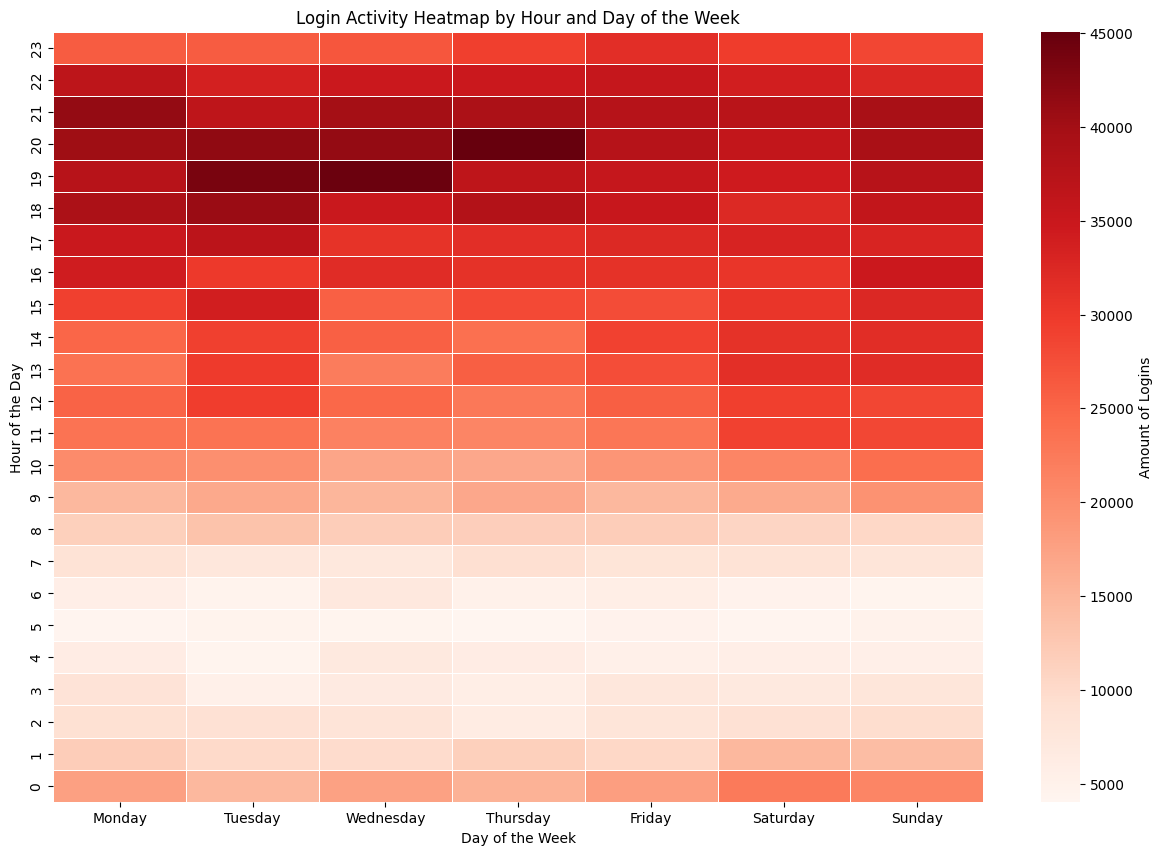

In [ ]:
from PlayerCounter import PlayerLogin
from PlayerCounter import PlayerLogout
from PlayerCounter import GetLevelProgression
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

logins = PlayerLogin()
logouts = PlayerLogout()
progression = GetLevelProgression()

estimatedSessionLengths = pd.merge(logins, logouts, on="pid")
estimatedSessionLengths = pd.merge(estimatedSessionLengths, progression, on=["pid", "LogoutTime"])

estimatedSessionLengths["LoginHour"] = estimatedSessionLengths["LoginTime"].dt.hour
estimatedSessionLengths["DayOfWeek"] = estimatedSessionLengths["LoginTime"].dt.day_name()

heatmapLogins = estimatedSessionLengths.groupby(["DayOfWeek", "LoginHour"]).size().unstack(fill_value=0)
heatmapLogins = heatmapLogins.reindex(["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"])

heatmapLogins = heatmapLogins.T#put days on the bottom
heatmapLogins = heatmapLogins.sort_index(ascending=False)#invert the hours so 0 is on the bottom

plt.figure(figsize=(15, 10))
sns.heatmap(heatmapLogins, cmap="Reds", fmt="d", linewidths=0.5, cbar_kws={'label': 'Amount of Logins'})

plt.title("Login Activity Heatmap by Hour and Day of the Week")
plt.xlabel("Day of the Week")
plt.ylabel("Hour of the Day")

plt.show()